In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils_nn as utlnn

In [2]:
x_test = pd.read_csv("./Train_Test/x_test.csv")
y_test = pd.read_csv("./Train_Test/y_test.csv")

In [ ]:
autoencoder_Lat_Lon = tf.keras.models.load_model('modelos_entrenamiento/entrenamiento_lat_lon_500_140.keras')
autoencoder_Height = tf.keras.models.load_model('modelos_entrenamiento/entrenamiento_alturas2.keras')

In [16]:
idx = 50 
lat_pred,lon_pred = autoencoder_Lat_Lon.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
lat_pred = lat_pred.flatten() #xq me devuelve un array bidimensional [[...],[...]]
lon_pred = lon_pred.flatten()

y_true = y_test.iloc[idx]
y_true_lat = y_true[0:100].to_numpy()
y_true_lon = y_true[100:200].to_numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


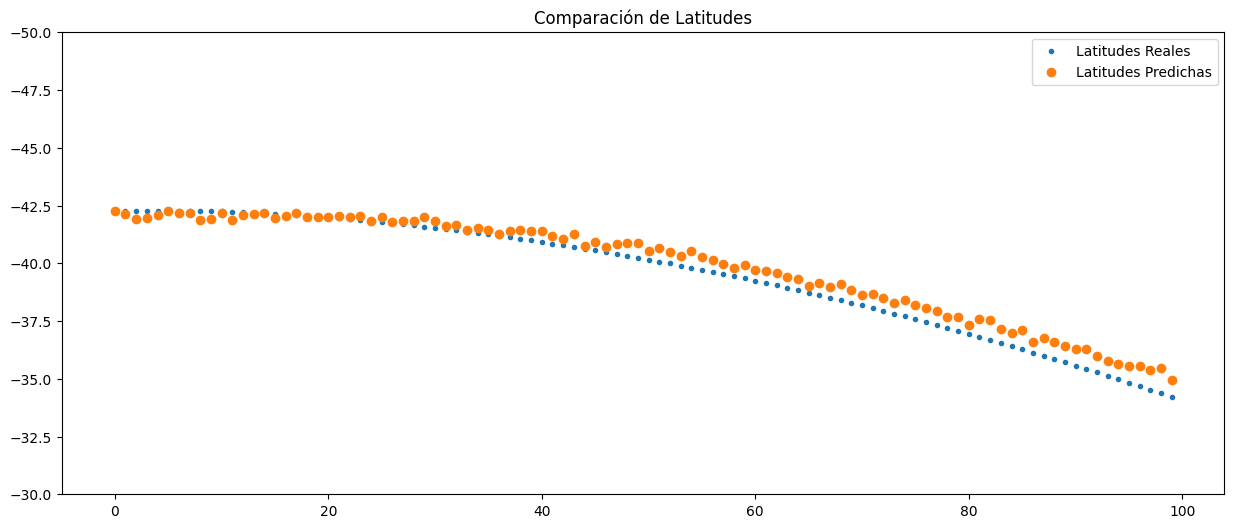

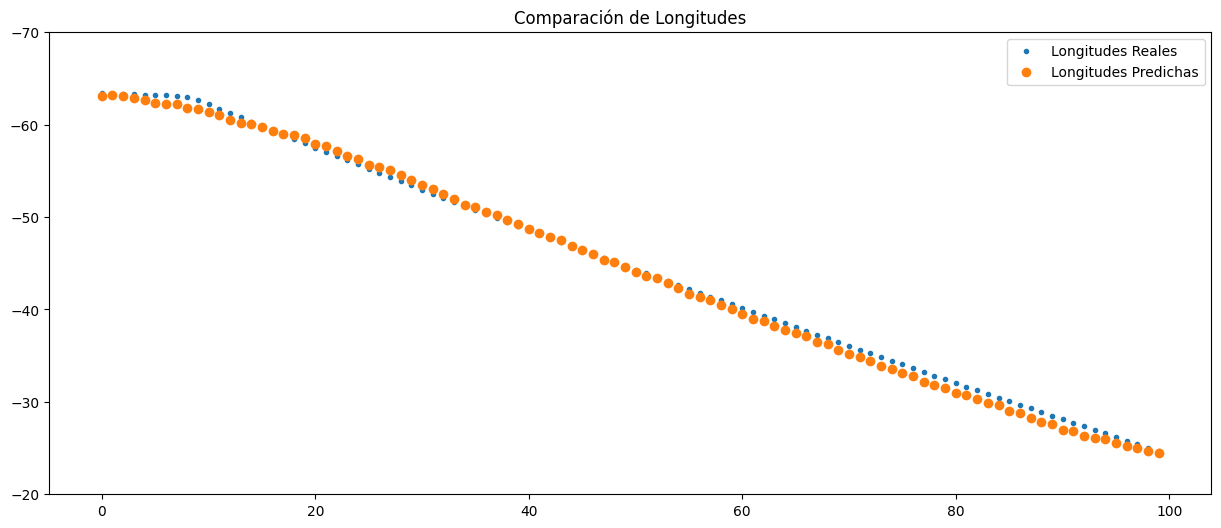

In [17]:
# Grafica Latitudes 
plt.figure(figsize = (15,6))
plt.plot(y_true_lat, label = 'Latitudes Reales', linestyle = 'None', marker = '.')
plt.plot(lat_pred, label = 'Latitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-30,-50)
plt.title('Comparación de Latitudes')
plt.legend()
plt.show()

# Graf. Longitudes
plt.figure(figsize=(15,6))
plt.plot(y_true_lon,label= 'Longitudes Reales', linestyle = 'None',marker= '.')
plt.plot(lon_pred,label= 'Longitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-20,-70)
plt.title("Comparación de Longitudes")
plt.legend()
plt.show()
